In [1]:
import pandas as pd

In [2]:
claims_df = pd.read_csv('HWA-Brovsi-WSA-Claims-Validated.csv', index_col='CLM_REF')
claims_df = claims_df.drop(['Index'], axis=1)

/Users/senhmo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
claims_df

,EMP_ID,CLM_SYS,WSA_TYP,FLEXBEN_TYPE,CLM_DT,CLM_YR,CLM_AMT,RCPT_DT,RCPT_DAY,DAY_TAG,CLM.STAT,REIMB_DT,REIMB_YR,EA_DT,RISK
CLM_REF,,,,,,,,,,,,,,,
EFSA0087162,11869,WSA,FLXI,5.0,4/11/16,2016,492.0,29/9/16,Thursday,WEEKDAY,3,3/1/17,2017,21/9/17,1
EFSA0087207,8965,WSA,FLXI,4.0,9/11/16,2016,471.0,30/9/16,Friday,WEEKDAY,3,3/1/17,2017,21/9/17,1
EFSA0087210,8998,WSA,FLXI,6.0,9/11/16,2016,496.0,30/9/16,Friday,WEEKDAY,3,7/1/17,2017,21/9/17,1
EFSA0087208,2098,WSA,FLXI,2.0,9/11/16,2016,464.0,3/10/16,Monday,WEEKDAY,3,5/1/17,2017,21/9/17,1
EFSA0087236,9331,WSA,FLXI,2.0,11/11/16,2016,454.0,6/10/16,Thursday,WEEKDAY,3,2/1/17,2017,21/9/17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EFSA0123860,8823,WSA,BIRT,NaN,27/11/18,2018,4.5,24/11/18,Saturday,WEEKEND,3,29/12/18,2018,NaN,0
EFSA0123873,11553,WSA,MIIS,NaN,28/11/18,2018,104.0,26/11/18,Monday,WEEKDAY,3,22/12/18,2018,NaN,1
EFSA0123875,1607,WSA,FLXI,3.0,29/11/18,2018,85.6,26/11/18,Monday,WEEKDAY,3,29/12/18,2018,NaN,0


In [4]:
claims_df['CLM_SYS'].unique()

array(['WSA'], dtype=object)

In [5]:
for each_column in claims_df.columns:
    print(each_column, claims_df[each_column].isna().sum())

EMP_ID 0
CLM_SYS 0
WSA_TYP 0
FLEXBEN_TYPE 16758
CLM_DT 0
CLM_YR 0
CLM_AMT 0
RCPT_DT 0
RCPT_DAY 0
DAY_TAG 0
CLM.STAT 0
REIMB_DT 0
REIMB_YR 0
EA_DT 5109
RISK 0


In [6]:
from datetime import datetime as dt
claims_df_nona = claims_df.dropna()
claims_df_nona = claims_df_nona.drop(['CLM_SYS'], axis=1)
claims_df_nona.columns

Index(['EMP_ID', 'WSA_TYP', 'FLEXBEN_TYPE', 'CLM_DT', 'CLM_YR', 'CLM_AMT',
       'RCPT_DT', 'RCPT_DAY', 'DAY_TAG', 'CLM.STAT', 'REIMB_DT', 'REIMB_YR',
       'EA_DT', 'RISK'],
      dtype='object')

In [7]:
claims_df_nona['ClaimTime'] = pd.DatetimeIndex(pd.to_datetime(claims_df_nona['CLM_DT'], format='%d/%m/%y') - pd.to_datetime(claims_df_nona['RCPT_DT'], format='%d/%m/%y')).day
claims_df_nona['DistriTime'] = pd.DatetimeIndex(pd.to_datetime(claims_df_nona['EA_DT'], format='%d/%m/%y') - pd.to_datetime(claims_df_nona['RCPT_DT'], format='%d/%m/%y')).day

/Users/senhmo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  """Entry point for launching an IPython kernel.
/Users/senhmo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  


In [8]:
claims_df_nona.shape

(17271, 16)

In [9]:
for each_column in claims_df_nona.columns:
    print(each_column, claims_df_nona[each_column].isna().sum())

EMP_ID 0
WSA_TYP 0
FLEXBEN_TYPE 0
CLM_DT 0
CLM_YR 0
CLM_AMT 0
RCPT_DT 0
RCPT_DAY 0
DAY_TAG 0
CLM.STAT 0
REIMB_DT 0
REIMB_YR 0
EA_DT 0
RISK 0
ClaimTime 0
DistriTime 0


In [10]:
claims_df_nona

,EMP_ID,WSA_TYP,FLEXBEN_TYPE,CLM_DT,CLM_YR,CLM_AMT,RCPT_DT,RCPT_DAY,DAY_TAG,CLM.STAT,REIMB_DT,REIMB_YR,EA_DT,RISK,ClaimTime,DistriTime
CLM_REF,,,,,,,,,,,,,,,,
EFSA0087162,11869,FLXI,5.0,4/11/16,2016,492.00,29/9/16,Thursday,WEEKDAY,3,3/1/17,2017,21/9/17,1,6,24
EFSA0087207,8965,FLXI,4.0,9/11/16,2016,471.00,30/9/16,Friday,WEEKDAY,3,3/1/17,2017,21/9/17,1,10,23
EFSA0087210,8998,FLXI,6.0,9/11/16,2016,496.00,30/9/16,Friday,WEEKDAY,3,7/1/17,2017,21/9/17,1,10,23
EFSA0087208,2098,FLXI,2.0,9/11/16,2016,464.00,3/10/16,Monday,WEEKDAY,3,5/1/17,2017,21/9/17,1,7,20
EFSA0087236,9331,FLXI,2.0,11/11/16,2016,454.00,6/10/16,Thursday,WEEKDAY,3,2/1/17,2017,21/9/17,1,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EFSA0118916,10471,FLXI,4.0,11/8/18,2018,500.00,21/7/18,Saturday,WEEKEND,3,26/9/18,2018,20/9/18,1,22,3
EFSA0119321,10426,FLXI,4.0,19/8/18,2018,347.00,21/7/18,Saturday,WEEKEND,3,28/9/18,2018,20/9/18,0,30,3
EFSA0119454,7814,FLXI,7.0,21/8/18,2018,75.47,21/7/18,Saturday,WEEKEND,3,29/9/18,2018,20/9/18,1,1,3


In [11]:
X = claims_df_nona.drop(['RISK'], axis=1)
X = pd.get_dummies(X)
y = claims_df_nona['RISK']

In [12]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=.2)

In [18]:
from sklearn.neural_network import MLPClassifier
nnclass = MLPClassifier(hidden_layer_sizes=[16], activation='logistic',max_iter=500,verbose=False)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
train_sizes = [43,50,100,250,500]

In [21]:
from sklearn.model_selection import learning_curve
# from sklearn.model_selection import ShuffleSplit

In [22]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = nnclass,X=X,
y=y, train_sizes = train_sizes, cv = 3,scoring='accuracy')

In [23]:
# Cross validation based training and test scores 

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[0.81395349 0.81395349 0.65116279]
 [0.82       0.58       0.56      ]
 [0.79       0.59       0.53      ]
 [0.764      0.692      0.692     ]
 [0.75       0.732      0.732     ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.7799201  0.45388223 0.23640785]
 [0.7799201  0.26107348 0.2199062 ]
 [0.7799201  0.46413062 0.42070523]
 [0.7799201  0.7800938  0.7800938 ]
 [0.7799201  0.7800938  0.7800938 ]]


In [24]:
# Calculate mean values of scores to plot
import numpy as np
train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_std = np.std(validation_scores, axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 43     0.759690
50     0.653333
100    0.636667
250    0.716000
500    0.738000
dtype: float64

 --------------------

Mean validation scores

 43     0.490070
50     0.420300
100    0.554919
250    0.780036
500    0.780036
dtype: float64


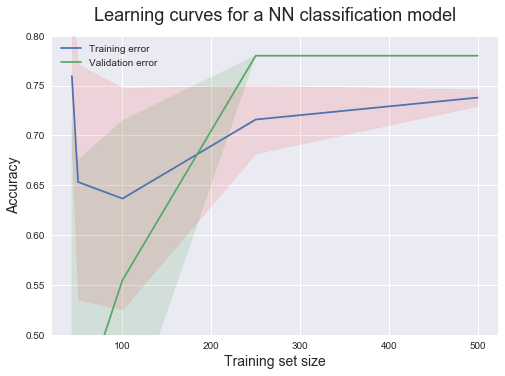

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a NN classification model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,.8)
plt.show()

In [ ]:
claim_extrapolated_df = pd.read_csv('HWA-Brovsi-WSA-Claims.csv', index_col='Index')
claim_extrapolated_nona_df = claim_extrapolated_df.dropna()
claim_extrapolated_nona_df['ClaimTime'] = pd.DatetimeIndex(pd.to_datetime(claim_extrapolated_nona_df['CLM_DT'], format='%d/%m/%y') - pd.to_datetime(claim_extrapolated_nona_df['RCPT_DT'], format='%d/%m/%y')).day
claim_extrapolated_nona_df['DistriTime'] = pd.DatetimeIndex(pd.to_datetime(claim_extrapolated_nona_df['EA_DT'], format='%d/%m/%y') - pd.to_datetime(claim_extrapolated_nona_df['RCPT_DT'], format='%d/%m/%y')).day
claim_extrapolated_nona_df=pd.get_dummies(claim_extrapolated_nona_df)
y_pred2 = nnclass.predict(claim_extrapolated_nona_df)

In [ ]:
y_pred2.sum()